In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import logger

# Plots

### Real Datasets

In [ ]:
# Initialize figure and subplots
fig, axes = plt.subplots(4, 2, figsize=(10, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

fig2, axes2 = plt.subplots(4, 2, figsize=(10, 10))
fig2.subplots_adjust(hspace=0.4, wspace=0.4)

datasets = {
    1: "Abalone",
    2: "Auto MPG",
    3: "California Housing",
    4: "Delta Ailerons",
    5: "LA Ozone",
    6: "Machine CPU",
    7: "Prostate Cancer",
    8: "Servo"
}

df_times = pd.DataFrame(columns=["dataset", "total_timing_ELM", "mean_loop_timing_ELM", "timing_approximated_ENRELM", "timing_incremental_ENRELM"])
dataset_index = 0
for key, value in datasets.items():
    dataset_index += 1
    name = value


    folder_path = os.path.join('results', 'datasets')
    full_path = os.path.join(folder_path, name + "_results.npz")

    results = np.load(full_path)



    # Plot figures
    ax = axes[(dataset_index-1)//2, (dataset_index-1)%2]
    ax2 = axes2[(dataset_index-1)//2, (dataset_index-1)%2]

    X_axis = np.arange(0, results['training_error_ELM'].shape[0]+1, 1)
    # Training error plots (existing code)
    ax.fill_between(X_axis, np.concatenate([np.array([1]), results["min_training_error_ELM"]]), np.concatenate([np.array([1]), results["max_training_error_ELM"]]), color='blue', alpha=0.2)
    ax.plot(X_axis, np.concatenate([np.array([1]), results["training_error_ELM"]]), 'b-', label='ELM')
    ax.plot(X_axis, np.concatenate([np.array([1]), results['training_error_approximated_ENRELM'][0:results['training_error_ELM'].shape[0]]]), 'r-', label='A-ENR-ELM')
    non_zeros_incremental_ENRELM_training = results['training_error_incremental_ENRELM'][results['training_error_incremental_ENRELM'] != 0]
    filled_incremental_ENRELM_training = np.ones(results['training_error_ELM'].shape[0] +1 - non_zeros_incremental_ENRELM_training.shape[0]) * non_zeros_incremental_ENRELM_training[-1]
    ax.plot(X_axis[0:non_zeros_incremental_ENRELM_training.shape[0]], non_zeros_incremental_ENRELM_training, 'g-', label='training error incremental ENRELM')
    ax.plot(X_axis[non_zeros_incremental_ENRELM_training.shape[0]:], filled_incremental_ENRELM_training, 'g--')
    ax.set_ylim(ax.get_ylim()[0],ax.get_ylim()[1])

    

    # Test error plots with similar insets (new code for ax2)
    ax2.fill_between(X_axis, np.concatenate([np.array([results['test_error_incremental_ENRELM'][0]]), results["min_test_error_ELM"]]), np.concatenate([np.array([results['test_error_incremental_ENRELM'][0]]), results["max_test_error_ELM"]]), color='blue', alpha=0.2)
    ax2.plot(X_axis, np.concatenate([np.array([results['test_error_incremental_ENRELM'][0]]), results['test_error_ELM']]), 'b-', label='ELM')
    ax2.plot(X_axis, np.concatenate([np.array([results['test_error_incremental_ENRELM'][0]]), results['test_error_approximated_ENRELM'][0:results['test_error_ELM'].shape[0]]]), 'r-', label='A-ENR-ELM')
    non_zeros_incremental_ENRELM_test = results['test_error_incremental_ENRELM'][results['test_error_incremental_ENRELM'] != 0]
    filled_incremental_ENRELM_test = np.ones(results['test_error_ELM'].shape[0] +1 - non_zeros_incremental_ENRELM_test.shape[0]) * non_zeros_incremental_ENRELM_test[-1]
    ax2.plot(X_axis[0:non_zeros_incremental_ENRELM_test.shape[0]], non_zeros_incremental_ENRELM_test, 'g-')
    ax2.plot(X_axis[non_zeros_incremental_ENRELM_test.shape[0]:], filled_incremental_ENRELM_test, 'g--')
    ax2.set_ylim(ax2.get_ylim()[0],ax2.get_ylim()[1])



    ax.set_title(name)
    ax.set_ylabel('RMSE')
    ax.grid(True)

    ax2.set_title(name)
    ax2.set_ylabel('RMSE')
    ax2.grid(True)


folder_path = os.path.join('results', 'images')
if not os.path.exists(folder_path):
    os.mkdir(folder_path)  
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=2, fontsize=12)
fig2.legend(handles, labels, loc='lower center', ncol=2, fontsize=12)
fig.subplots_adjust(bottom=0.1)
#fig.savefig(os.path.join(folder_path, "image_training_real_datasets.eps"), format="eps")
#fig.savefig(os.path.join(folder_path, "image_training_real_datasets.png"))

fig2.subplots_adjust(bottom=0.1)
#fig2.savefig(os.path.join(folder_path, "image2_test_real_datasets.eps"), format="eps")
#fig2.savefig(os.path.join(folder_path, "image2_test_real_datasets.png"))
fig.show()
fig2.show()


### Synthetic Datasets

In [2]:
def filter_csv(file_path, T=None, n0=None, X_distribution=None, X_range=None, 
               X_cov=None, X_rho=None, y_function=None, y_terms=None, y_SNR=None):
    # Read the CSV file
    df = pd.read_csv(file_path, sep=';')  # Assuming ';' is the delimiter 
    
    # Applying filters based on provided parameters
    filters = {
        'T': T,
        'n0': n0,
        'X_distribution': X_distribution,
        'X_range': X_range,
        'X_cov': X_cov,
        'X_rho': X_rho,
        'y_function': y_function,
        'y_terms': y_terms,
        'y_SNR': y_SNR
    }
    
    # Remove None values from filters
    filters = {key: value for key, value in filters.items() if value is not None}
    #print(filters)
    # Filter the DataFrame
    for column, value in filters.items():
        #print(column + "\t\t" + str(value))
        df = df[df[column] == value]

    if len(df['index'].tolist()) > 1:
        logger.error("Found more than one synthetic dataset matching filter, unable to identify a single dataset")
    elif len(df['index'].tolist()) == 0:
        logger.error("Found 0 synthetic dataset matching filter")

    # Return the index of the filtered rows
    return df['index'].tolist()[0]

In [5]:
def plot_synthetic(first_idx = 1, last_idx = 12, T=300, n0 = 20):
    # Initialize figure and subplots
    fig, axes = plt.subplots(6, 2, figsize=(12, 12.5))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)

    fig2, axes2 = plt.subplots(6, 2, figsize=(12, 12.5))
    fig2.subplots_adjust(hspace=0.4, wspace=0.4)


    # Define conditions
    y_SNR_values = [2, 10]
    y_functions = ["linear", "shallow"]
    X_distributions = ["uniform", "gaussian"]
    X_covs = ["iid", "toeplix"]

    # Titles for columns
    column_titles = ["SNR = 2", "SNR = 10"]

    # Add column titles
    for i, title in enumerate(column_titles):
        fig.text(0.25 + i * 0.5, 0.92, title, ha='center', fontsize=14)
        fig2.text(0.25 + i * 0.5, 0.92, title, ha='center', fontsize=14)

    fig.text(0.02, 0.7, 'Linear Function', ha='center', va='center', rotation='vertical', fontsize=14)
    fig.text(0.02, 0.3, 'Shallow NN Function', ha='center', va='center', rotation='vertical', fontsize=14)
    fig2.text(0.02, 0.7, 'Linear Function', ha='center', va='center', rotation='vertical', fontsize=14)
    fig2.text(0.02, 0.3, 'Shallow NN Function', ha='center', va='center', rotation='vertical', fontsize=14)



    # Iterate through each combination to place in the correct subplot
    for i, y_SNR in enumerate(y_SNR_values):
        for j, y_function in enumerate(y_functions):
            for k, X_distribution in enumerate(X_distributions):
                if X_distribution == "uniform":
                    row = 0
                    X_cov = "//"
                    title = r"$X \sim \text{Unif}(-2\pi, 2\pi)$"
                    col = 0 if y_SNR == 2 else 1

                    if col == 0:  # Only place it for the first column to avoid repetition
                        fig.text(0.06, 0.83 - (3 * j + row) * 0.135, title, ha='center', va='center', rotation='vertical', fontsize=12)
                        fig2.text(0.06, 0.83 - (3 * j + row) * 0.135, title, ha='center', va='center', rotation='vertical', fontsize=12)

                    ax = axes[row + 3*j, col]

                    dataset_index = filter_csv("synthetic_datasets_description.csv", T, n0, X_distribution, X_cov = X_cov, y_function= y_function, y_SNR=y_SNR)
                    name = "dataset_" + str(dataset_index)
                    folder_path = os.path.join('results', 'datasets')
                    full_path = os.path.join(folder_path, name + "_results.npz")
                    results = np.load(full_path)

                    # Plot figures
                    ax = axes[row + 3*j, col]
                    ax2 = axes2[row + 3*j, col]

                    X_axis = np.arange(0, results['training_error_ELM'].shape[0]+1, 1)
                    # Training error plots (existing code)
                    ax.fill_between(X_axis, np.concatenate([np.array([1]), results["min_training_error_ELM"]]), np.concatenate([np.array([1]), results["max_training_error_ELM"]]), color='blue', alpha=0.2)
                    ax.plot(X_axis, np.concatenate([np.array([1]), results["training_error_ELM"]]), 'b-', label='ELM')
                    ax.plot(X_axis, np.concatenate([np.array([1]), results['training_error_approximated_ENRELM'][0:results['training_error_ELM'].shape[0]]]), 'r-', label='A-ENR-ELM')
                    non_zeros_incremental_ENRELM_training = results['training_error_incremental_ENRELM'][results['training_error_incremental_ENRELM'] != 0]
                    filled_incremental_ENRELM_training = np.ones(results['training_error_ELM'].shape[0] +1 - non_zeros_incremental_ENRELM_training.shape[0]) * non_zeros_incremental_ENRELM_training[-1]
                    ax.plot(X_axis[0:non_zeros_incremental_ENRELM_training.shape[0]], non_zeros_incremental_ENRELM_training, 'g-', label='I-ENR-ELM')
                    ax.plot(X_axis[non_zeros_incremental_ENRELM_training.shape[0]:], filled_incremental_ENRELM_training, 'g--')
                    ax.set_ylim(ax.get_ylim()[0],ax.get_ylim()[1])

                    
                    #for ELM and A-ENRELM the first error is set equal to the first of I-ENRELM since it represent the usage of mean(y_train) as predictor
                    # Test error plots with similar insets (new code for ax2)
                    ax2.fill_between(X_axis, np.concatenate([np.array([results['test_error_incremental_ENRELM'][0]]), results["min_test_error_ELM"]]), np.concatenate([np.array([results['test_error_incremental_ENRELM'][0]]), results["max_test_error_ELM"]]), color='blue', alpha=0.2)
                    ax2.plot(X_axis, np.concatenate([np.array([results['test_error_incremental_ENRELM'][0]]), results['test_error_ELM']]), 'b-', label='ELM')
                    ax2.plot(X_axis, np.concatenate([np.array([results['test_error_incremental_ENRELM'][0]]), results['test_error_approximated_ENRELM'][0:results['test_error_ELM'].shape[0]]]), 'r-', label='A-ENR-ELM')
                    non_zeros_incremental_ENRELM_test = results['test_error_incremental_ENRELM'][results['test_error_incremental_ENRELM'] != 0]
                    filled_incremental_ENRELM_test = np.ones(results['test_error_ELM'].shape[0] +1 - non_zeros_incremental_ENRELM_test.shape[0]) * non_zeros_incremental_ENRELM_test[-1]
                    ax2.plot(X_axis[0:non_zeros_incremental_ENRELM_test.shape[0]], non_zeros_incremental_ENRELM_test, 'g-', label = "I-ENR-ELM")
                    ax2.plot(X_axis[non_zeros_incremental_ENRELM_test.shape[0]:], filled_incremental_ENRELM_test, 'g--')
                    ax2.set_ylim(ax2.get_ylim()[0],ax2.get_ylim()[1])



                    ax.set_title(name)
                    ax.set_ylabel('RMSE')
                    ax.grid(True)

                    ax2.set_title(name)
                    ax2.set_ylabel('RMSE')
                    ax2.grid(True)


                elif X_distribution == "gaussian":
                    for l, X_cov in enumerate(X_covs):
                        if X_cov == "iid":
                            row = 1
                            title = r"$X \sim \mathcal{N}(0, I)$"
                        elif X_cov == "toeplix":
                            row = 2
                            title = r"$X \sim \mathcal{N}(0, \text{Toeplix})$"
                        col = 0 if y_SNR == 2 else 1

                        # Place the row title, rotated vertically, on the left of both figures
                        if col == 0:  # Only place it for the first column to avoid repetition
                            fig.text(0.06, 0.83 - (3 * j + row) * 0.135, title, ha='center', va='center', rotation='vertical', fontsize=12)
                            fig2.text(0.06, 0.83 - (3 * j + row) * 0.135, title, ha='center', va='center', rotation='vertical', fontsize=12)


                        dataset_index = filter_csv("synthetic_datasets_description.csv", T, n0, X_distribution, X_cov = X_cov, y_function= y_function, y_SNR=y_SNR)
                        name = "dataset_" + str(dataset_index)
                        folder_path = os.path.join('results', 'datasets')
                        full_path = os.path.join(folder_path, name + "_results.npz")
                        results = np.load(full_path)
                        
                        # Plot figures
                        ax = axes[row + 3*j, col]
                        ax2 = axes2[row + 3*j, col]

                        X_axis = np.arange(0, results['training_error_ELM'].shape[0]+1, 1)

                        # Training error plots (existing code)
                        ax.fill_between(X_axis, np.concatenate([np.array([1]), results["min_training_error_ELM"]]), np.concatenate([np.array([1]), results["max_training_error_ELM"]]), color='blue', alpha=0.2)
                        ax.plot(X_axis, np.concatenate([np.array([1]), results["training_error_ELM"]]), 'b-', label='ELM')
                        ax.plot(X_axis, np.concatenate([np.array([1]), results['training_error_approximated_ENRELM']]), 'r-', label='A-ENR-ELM')
                        non_zeros_incremental_ENRELM_training = results['training_error_incremental_ENRELM'][results['training_error_incremental_ENRELM'] != 0]
                        filled_incremental_ENRELM_training = np.ones(results['training_error_ELM'].shape[0] +1 - non_zeros_incremental_ENRELM_training.shape[0]) * non_zeros_incremental_ENRELM_training[-1]
                        ax.plot(X_axis[0:non_zeros_incremental_ENRELM_training.shape[0]], non_zeros_incremental_ENRELM_training, 'g-', label='I-ENR-ELM')
                        ax.plot(X_axis[non_zeros_incremental_ENRELM_training.shape[0]:], filled_incremental_ENRELM_training, 'g--')
                        ax.set_ylim(ax.get_ylim()[0],ax.get_ylim()[1])

                        
                        #for ELM and A-ENRELM the first error is set equal to the first of I-ENRELM since it represent the usage of mean(y_train) as predictor
                        # Test error plots with similar insets (new code for ax2)
                        ax2.fill_between(X_axis, np.concatenate([np.array([results['test_error_incremental_ENRELM'][0]]), results["min_test_error_ELM"]]), np.concatenate([np.array([results['test_error_incremental_ENRELM'][0]]), results["max_test_error_ELM"]]), color='blue', alpha=0.2)
                        ax2.plot(X_axis, np.concatenate([np.array([results['test_error_incremental_ENRELM'][0]]), results['test_error_ELM']]), 'b-', label='ELM')
                        ax2.plot(X_axis, np.concatenate([np.array([results['test_error_incremental_ENRELM'][0]]), results['test_error_approximated_ENRELM']]), 'r-', label='A-ENR-ELM')
                        non_zeros_incremental_ENRELM_test = results['test_error_incremental_ENRELM'][results['test_error_incremental_ENRELM'] != 0]
                        filled_incremental_ENRELM_test = np.ones(results['test_error_ELM'].shape[0] +1 - non_zeros_incremental_ENRELM_test.shape[0]) * non_zeros_incremental_ENRELM_test[-1]
                        ax2.plot(X_axis[0:non_zeros_incremental_ENRELM_test.shape[0]], non_zeros_incremental_ENRELM_test, 'g-', label = "I-ENR-ELM")
                        ax2.plot(X_axis[non_zeros_incremental_ENRELM_test.shape[0]:], filled_incremental_ENRELM_test, 'g--')
                        ax2.set_ylim(ax2.get_ylim()[0],ax2.get_ylim()[1])



                        ax.set_title(name)
                        ax.set_ylabel('RMSE')
                        ax.grid(True)

                        ax2.set_title(name)
                        ax2.set_ylabel('RMSE')
                        ax2.grid(True)
                    

    folder_path = os.path.join('results', 'images')
    if not os.path.exists(folder_path):
        os.mkdir(folder_path)  
    folder_path = os.path.join('results', 'images')
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='lower center', ncol=2, fontsize=12)
    handles2, labels2 = ax2.get_legend_handles_labels()
    fig2.legend(handles2, labels2, loc='lower center', ncol=2, fontsize=12)
    fig.subplots_adjust(bottom=0.1)
    #fig.savefig(os.path.join(folder_path, "image_training_synthetic_datasets_" + str(n0) + ".eps"), format="eps")
    fig.savefig(os.path.join(folder_path, "image_training_synthetic_datasets_" + str(T) + "_" + str(n0) + ".png"))

    fig2.subplots_adjust(bottom=0.1)
    #fig2.savefig(os.path.join(folder_path, "image2_test_synthetic_datasets_" + str(n0) + ".eps"), format="eps")
    fig2.savefig(os.path.join(folder_path, "image2_test_synthetic_datasets_" + str(T) + "_" + str(n0) + ".png"))
    fig.show()
    fig2.show()




INFO:matplotlib.mathtext:Substituting symbol N from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol N from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol N from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol N from STIXNonUnicode
C:\Users\fabia\AppData\Local\Temp\ipykernel_30168\4047702139.py:167: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\fabia\AppData\Local\Temp\ipykernel_30168\4047702139.py:168: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig2.show()
INFO:matplotlib.mathtext:Substituting symbol N from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol N from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol N from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol N from STIXNonUnicode
C:\Users\fabia\AppData\Local\Temp\ipykernel_30168\4047702139.py:167: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.sh

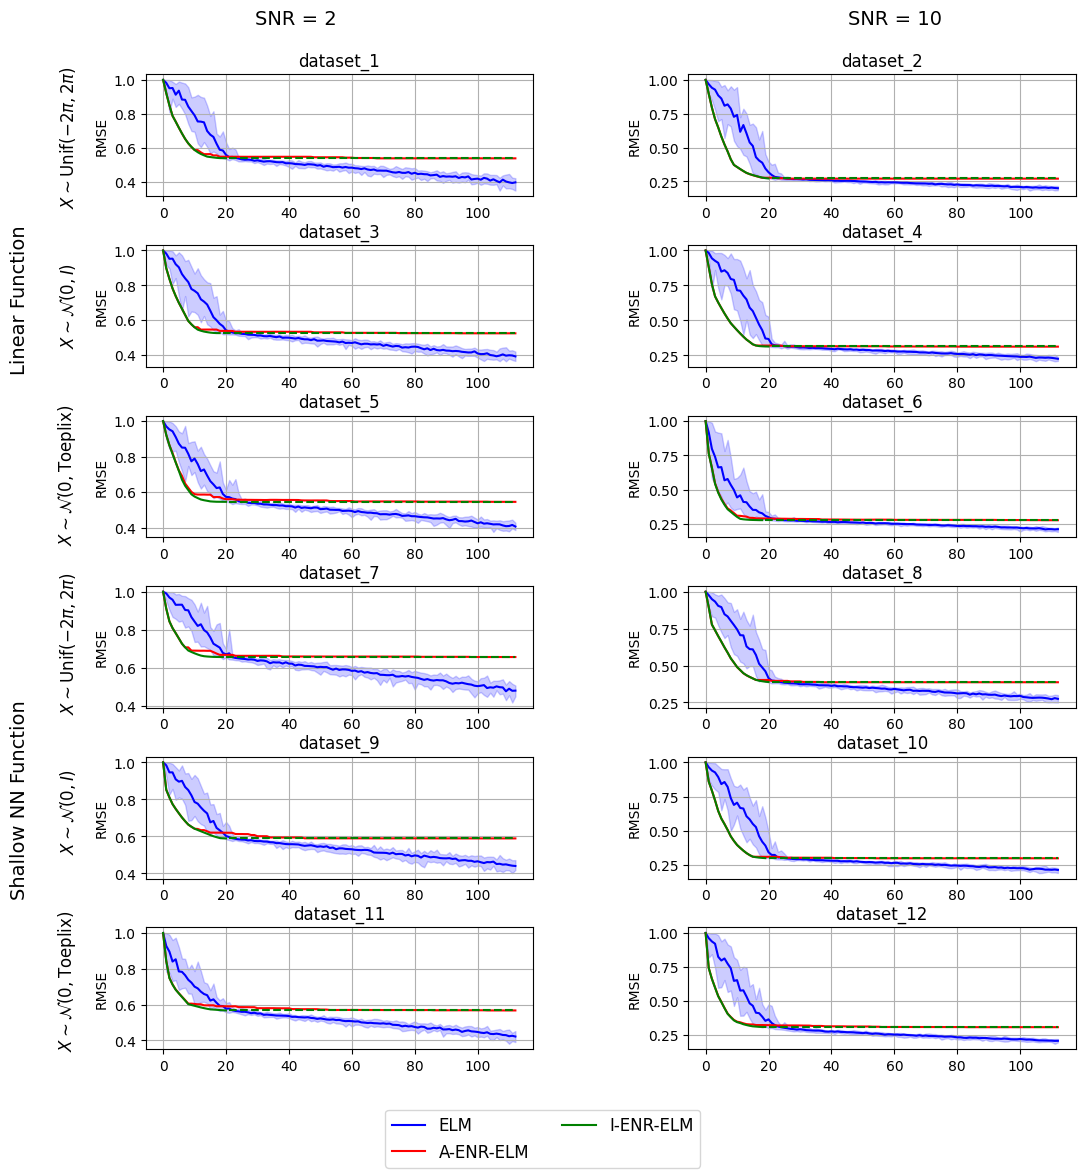

INFO:matplotlib.mathtext:Substituting symbol N from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol N from STIXNonUnicode


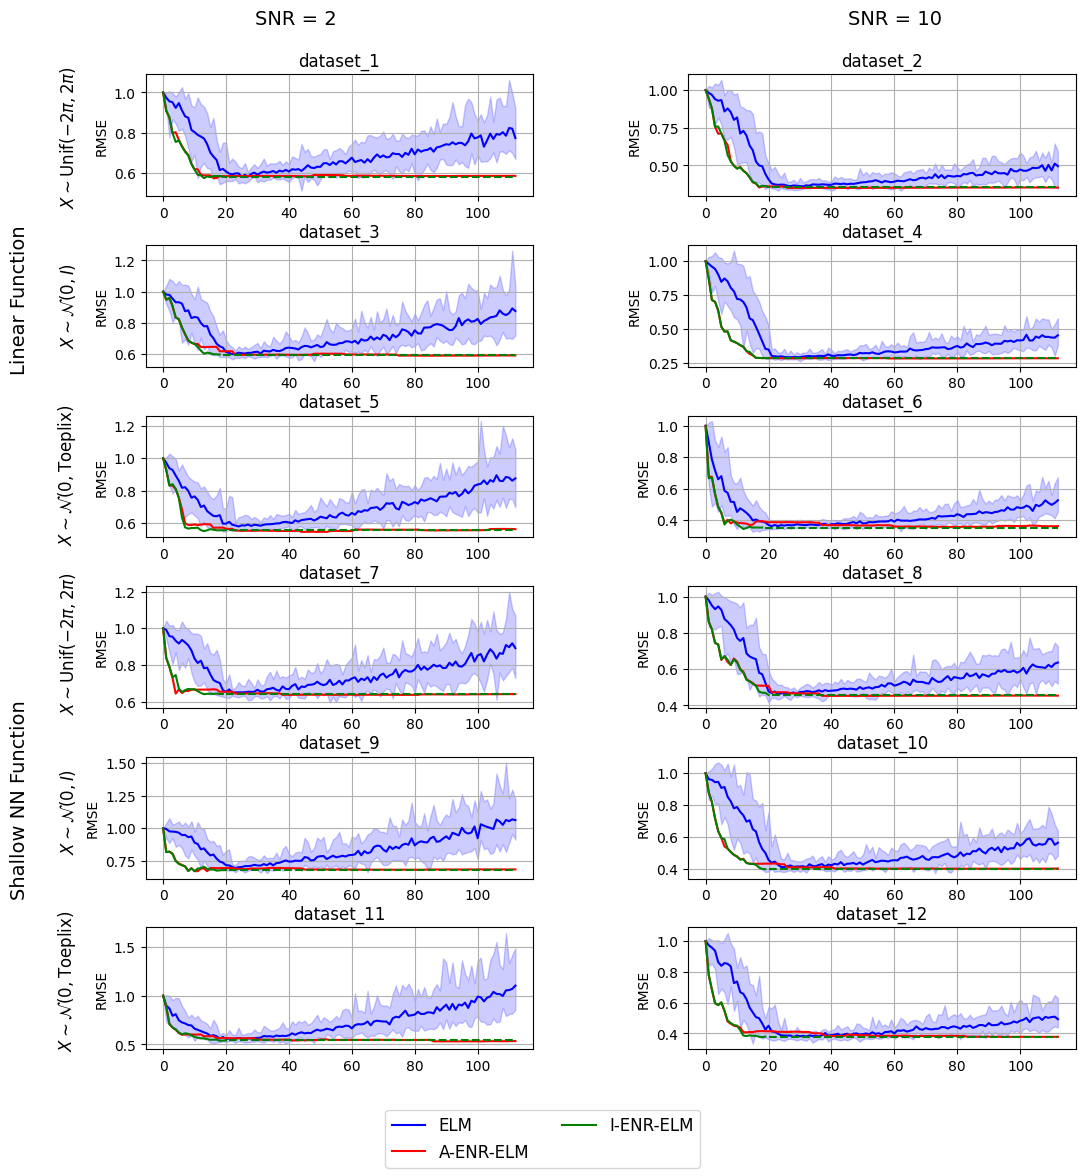

INFO:matplotlib.mathtext:Substituting symbol N from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol N from STIXNonUnicode


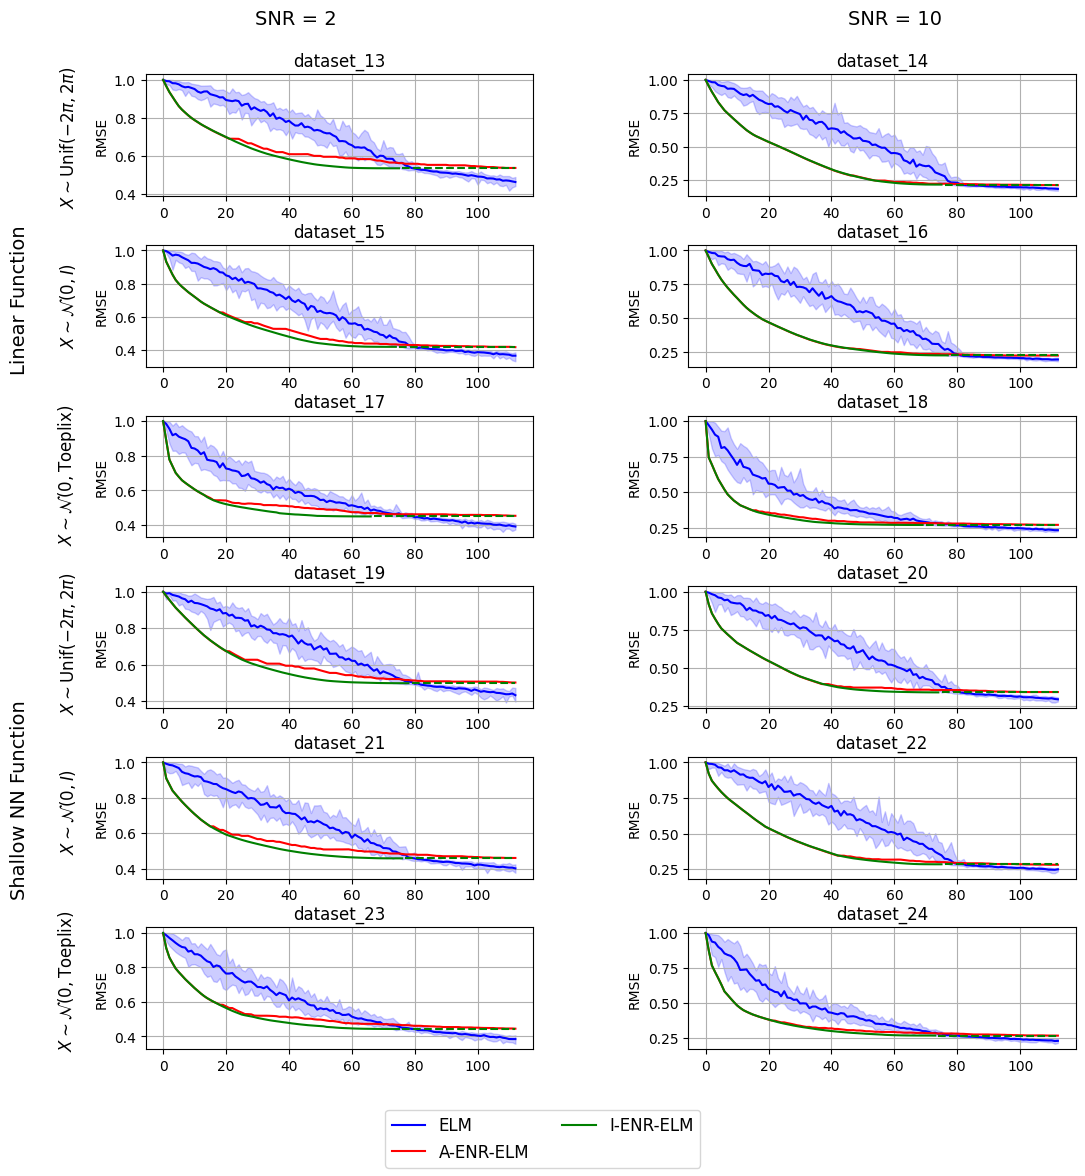

INFO:matplotlib.mathtext:Substituting symbol N from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol N from STIXNonUnicode


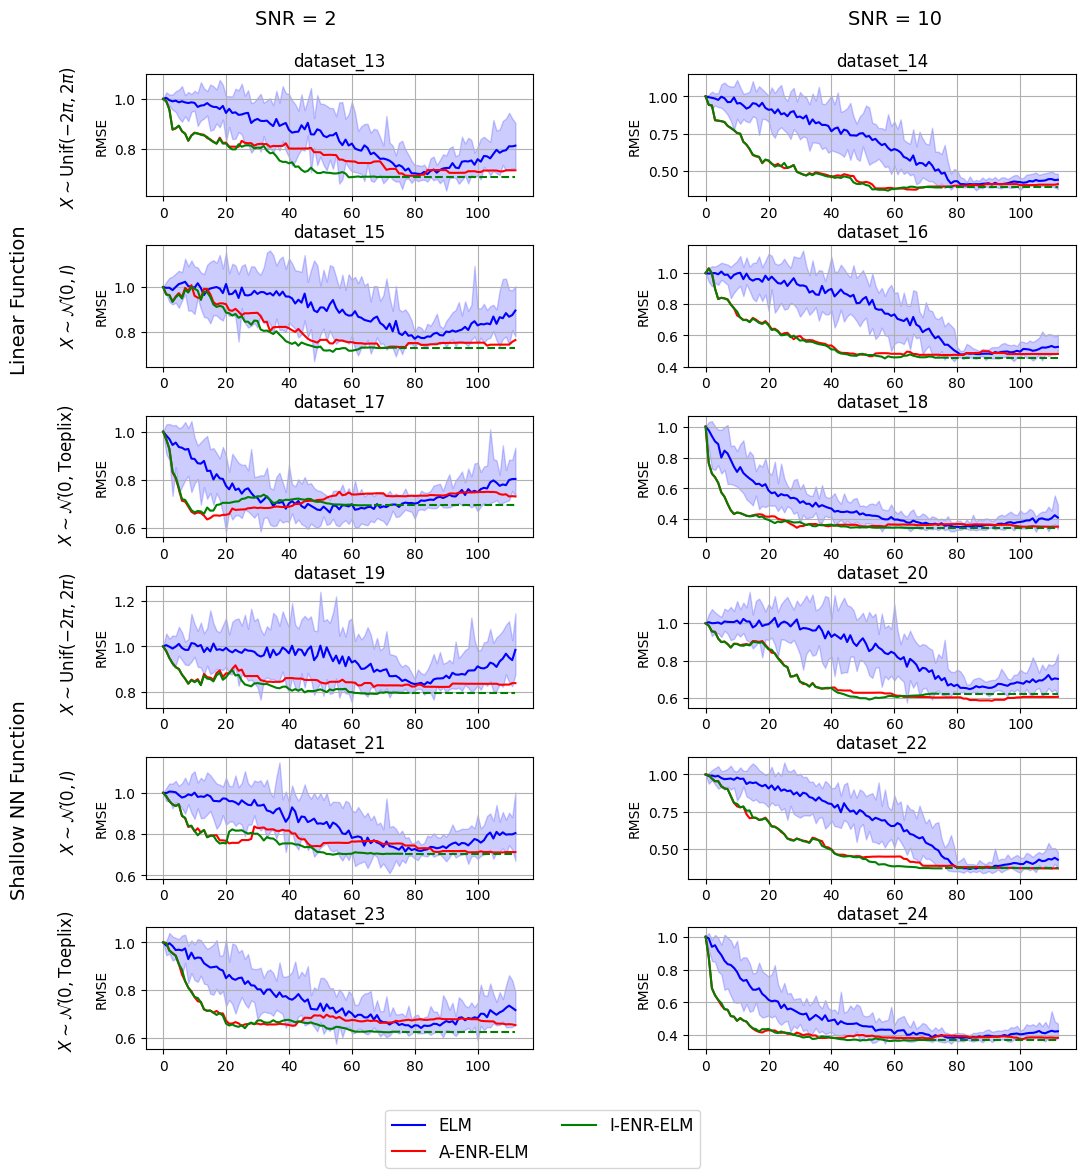

INFO:matplotlib.mathtext:Substituting symbol N from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol N from STIXNonUnicode


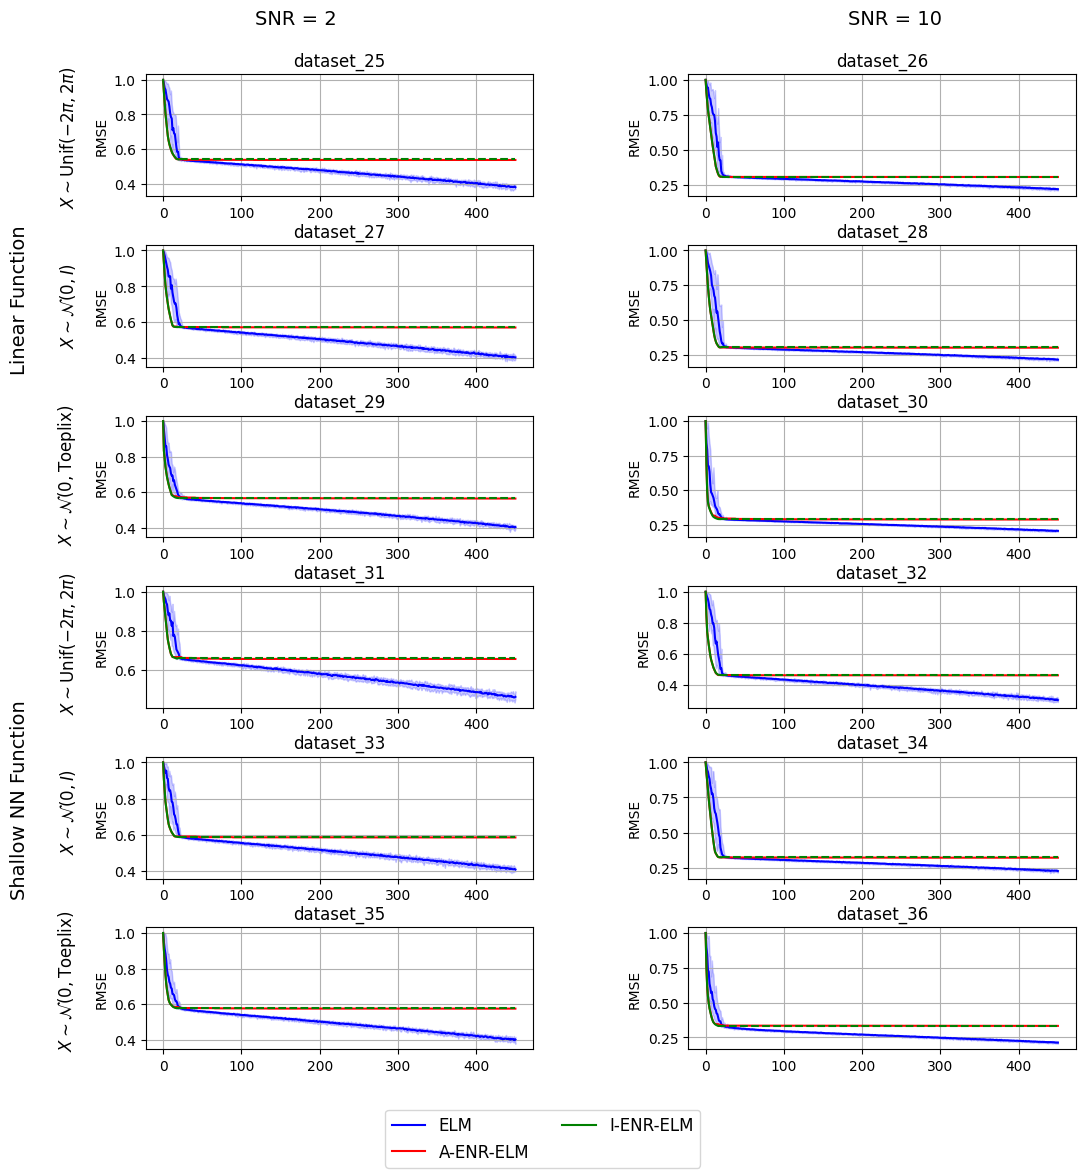

INFO:matplotlib.mathtext:Substituting symbol N from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol N from STIXNonUnicode


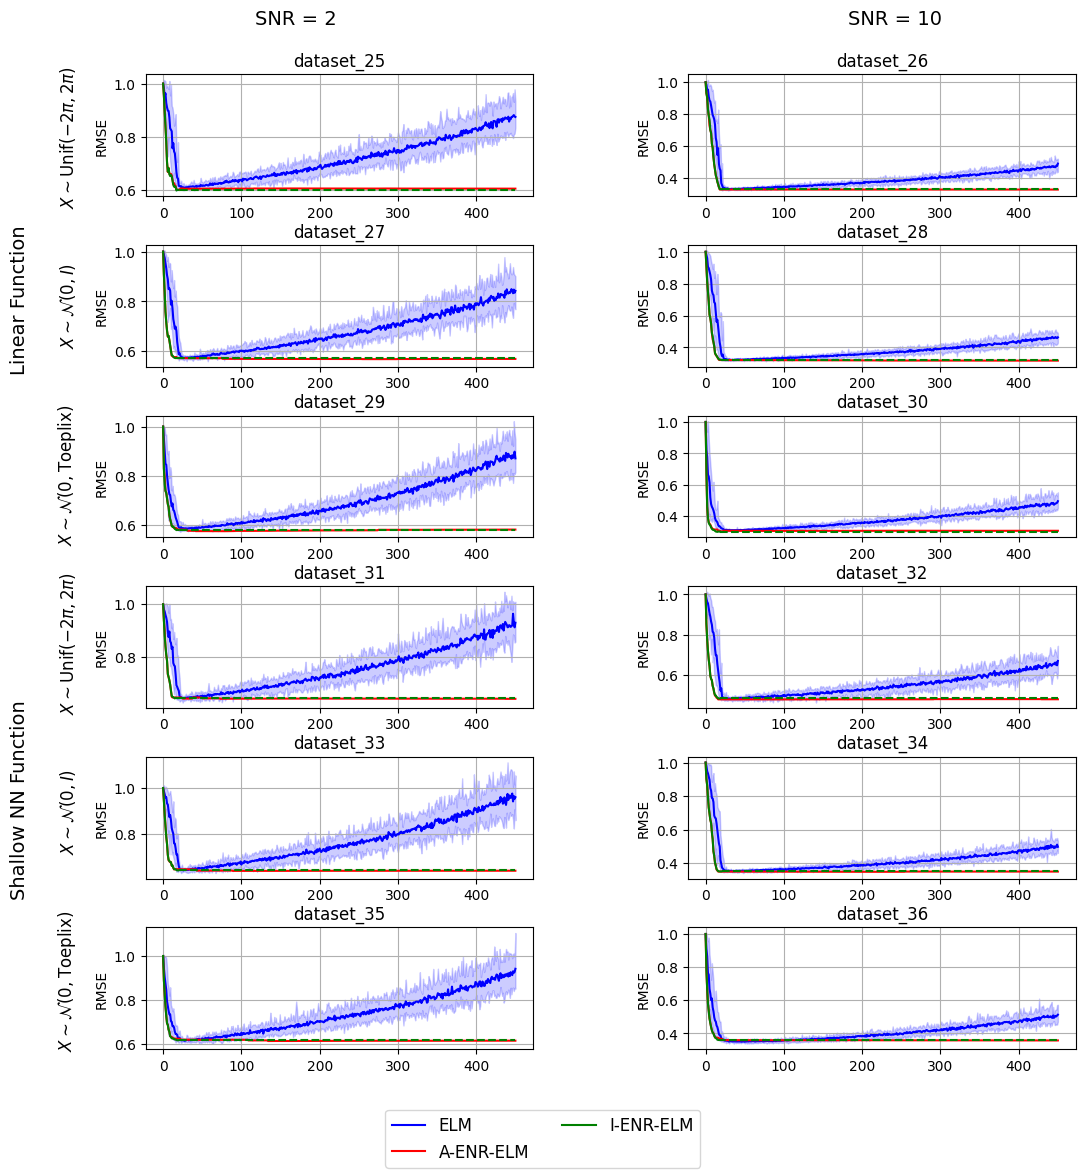

INFO:matplotlib.mathtext:Substituting symbol N from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol N from STIXNonUnicode


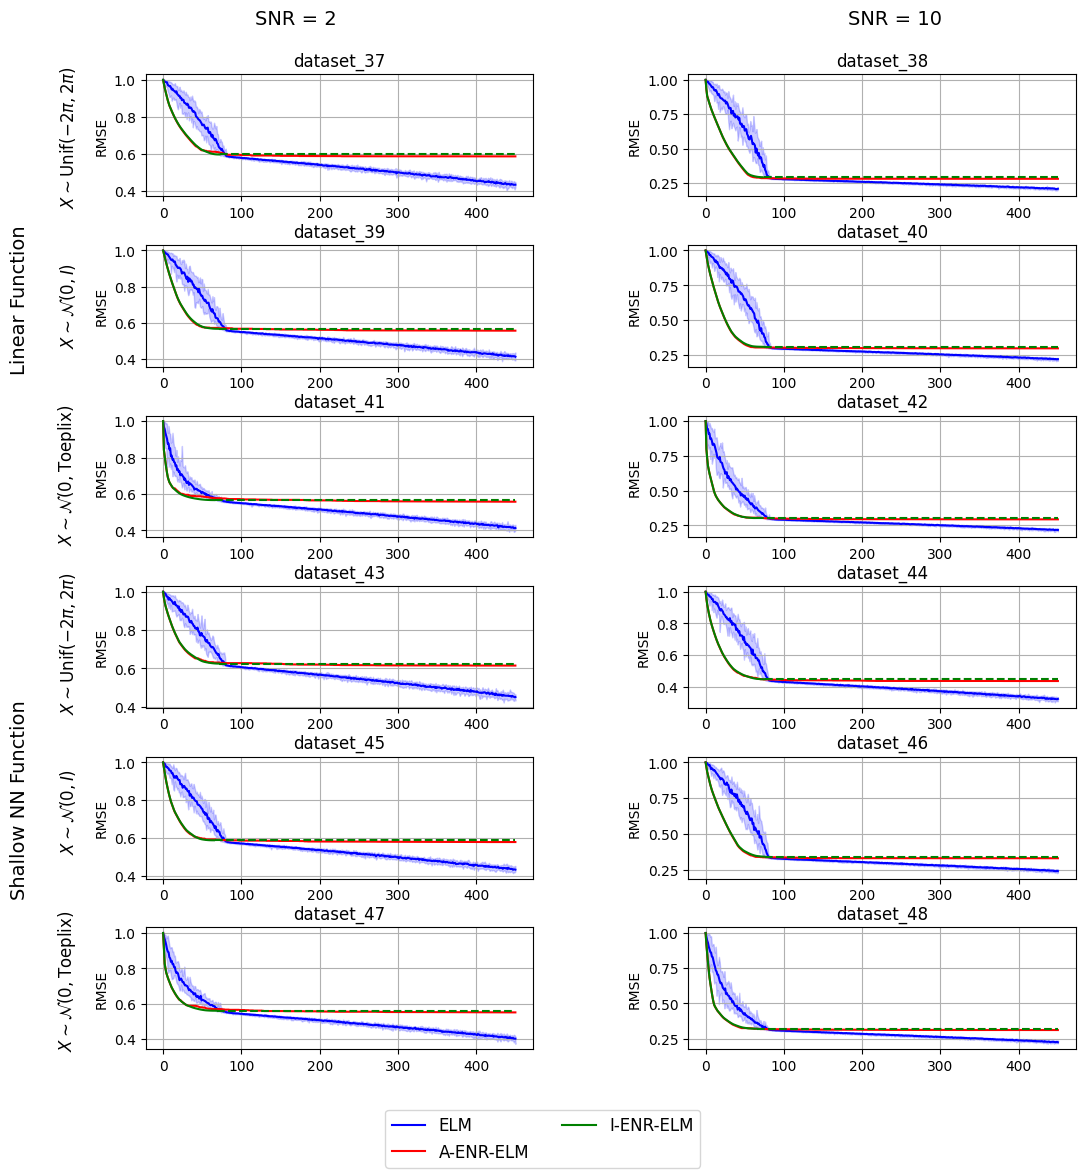

INFO:matplotlib.mathtext:Substituting symbol N from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol N from STIXNonUnicode


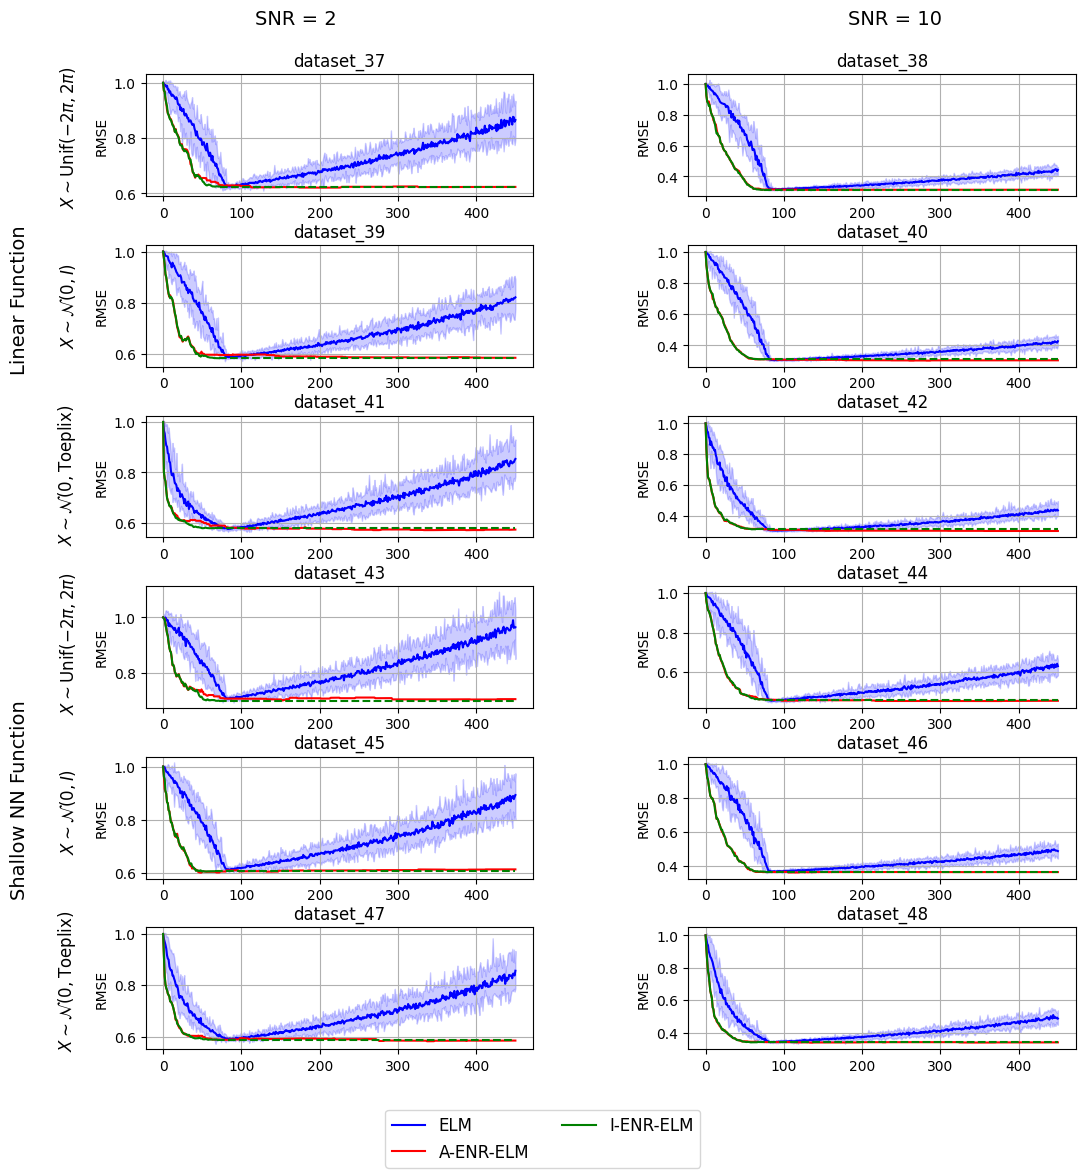

In [6]:
plot_synthetic(first_idx = 1, last_idx = 12, T = 300, n0 = 20)
plot_synthetic(first_idx = 13, last_idx = 24, T = 300, n0 = 80)
plot_synthetic(first_idx = 25, last_idx = 36, T = 1200, n0 = 20)
plot_synthetic(first_idx = 37, last_idx = 48, T = 1200, n0 = 80)

# Tables

## Performance

In [ ]:

datasets = {
    1: "Abalone",
    2: "Auto MPG",
    3: "California Housing",
    4: "Delta Ailerons",
    5: "LA Ozone",
    6: "Machine CPU",
    7: "Prostate Cancer",
    8: "Servo"
}

# Columns we want to populate in the DataFrame
metrics = [
    'test_error_approximated_ENRELM', 
    'test_error_incremental_ENRELM', 
    'test_error_ELM'
]

# Generate new column names for each metric
columns = ['dataset']
for metric in metrics:
    columns.append(f"{metric}_n")
    columns.append(f"{metric}_value")

# Initialize an empty DataFrame to store results
df = pd.DataFrame(index=datasets.keys(), columns=columns)

# Iterate through each dataset
for key, value in datasets.items():
    # Extract the dataset name
    name = value
    
    # Load the results for the dataset
    folder_path = os.path.join('results', 'datasets')
    full_path = os.path.join(folder_path, name + "_results.npz")
    results = np.load(full_path)
    df.loc[key, 'dataset'] = name
    
    # Populate the DataFrame for each metric
    for metric in metrics:
        # Extract the array for the current metric
        metric_values = results[metric]
        
        # Handle ELM metrics differently as they involve mean and std
        if "training_error_ELM" in metric or "test_error_ELM" in metric:
            std_key = "std_" + metric
            std_values = results[std_key]
            min_index = np.argmin(metric_values)
            min_value = metric_values[min_index]
            std_value = std_values[min_index]
            # Set values for the new columns
            df.loc[key, f"{metric}_n"] = min_index
            df.loc[key, f"{metric}_value"] = f"{min_value:.4f} +/- {std_value:.4f}"
        else:
            # For other metrics, simply find the argmin and min
            min_index = np.argmin(metric_values)
            min_value = metric_values[min_index]
            # Set values for the new columns
            df.loc[key, f"{metric}_n"] = min_index
            df.loc[key, f"{metric}_value"] = f"{min_value:.4f}"

# Save the DataFrame as a CSV file
folder_path = os.path.join('results', 'tables')
if not os.path.exists(folder_path):
    os.mkdir(folder_path)  
df.to_csv(os.path.join(folder_path, "results_table_real.csv"), index=False)

# Print the DataFrame to check the output
print(df)

In [7]:
def performance_table_synthetic(first_idx, last_idx):
    # Columns we want to populate in the DataFrame
    metrics = [
        'test_error_approximated_ENRELM', 
        'test_error_incremental_ENRELM', 
        'test_error_ELM'
    ]

    # Generate new column names for each metric
    columns = ['dataset']
    for metric in metrics:
        columns.append(f"{metric}_n")
        columns.append(f"{metric}_value")

    dataset_names = []
    for idx in range(first_idx, last_idx+1):
        # Extract the dataset name
        name = "dataset_" + str(idx)
        dataset_names.append(name)

    # Initialize an empty DataFrame to store results
    df = pd.DataFrame(index=dataset_names, columns=columns)

    # Iterate through each dataset
    for name in dataset_names:
        # Load the results for the dataset
        folder_path = os.path.join('results', 'datasets')
        full_path = os.path.join(folder_path, name + "_results.npz")
        results = np.load(full_path)
        df.loc[name, 'dataset'] = name
        
        # Populate the DataFrame for each metric
        for metric in metrics:
            # Extract the array for the current metric
            metric_values = results[metric]
            
            # Handle ELM metrics differently as they involve mean and std
            if "training_error_ELM" in metric or "test_error_ELM" in metric:
                std_key = "std_" + metric
                std_values = results[std_key]
                min_index = np.argmin(metric_values)
                min_value = metric_values[min_index]
                std_value = std_values[min_index]
                # Set values for the new columns
                df.loc[name, f"{metric}_n"] = min_index
                df.loc[name, f"{metric}_value"] = f"{min_value:.4f} +/- {std_value:.4f}"
            else:
                # For other metrics, simply find the argmin and min
                min_index = np.argmin(metric_values)
                min_value = metric_values[min_index]
                # Set values for the new columns
                df.loc[name, f"{metric}_n"] = min_index
                df.loc[name, f"{metric}_value"] = f"{min_value:.4f}"

    # Save the DataFrame as a CSV file
    folder_path = os.path.join('results', 'tables')
    if not os.path.exists(folder_path):
        os.mkdir(folder_path)  
    df.to_csv(os.path.join(folder_path, "results_table_synthetic" + str(first_idx) + "_" + str(last_idx)+ ".csv"), index=False)

    # Print the DataFrame to check the output
    print(df)

In [ ]:
performance_table_synthetic(first_idx = 1, last_idx = 12)
performance_table_synthetic(first_idx = 13, last_idx = 24)
performance_table_synthetic(first_idx = 25, last_idx = 36)
performance_table_synthetic(first_idx = 37, last_idx = 48)

## Times

In [ ]:
# Load the compressed file containing the dataframe
folder_path = os.path.join('results', 'datasets')
filename = "times_real.csv"
full_path = os.path.join(folder_path, filename)


# Extracting the dataframe from the loaded data
df_times = pd.read_csv(full_path, sep=";").drop(columns=["iteration"])

# Grouping by 'dataset' and calculating the mean for all other columns
df_means = df_times.groupby("dataset", as_index=False).mean()

folder_path = os.path.join('results', 'tables')
if not os.path.exists(folder_path):
    os.mkdir(folder_path)  
df_means.to_csv(os.path.join(folder_path, "times_table_real.csv"), index=False)
print(df_means)

In [ ]:
# Load the compressed file containing the dataframe
folder_path = os.path.join('results', 'datasets')
first_idx = 1
last_idx = 48
filename = "times_synthetic"+ str(first_idx) + "_" + str(last_idx)+".csv"
full_path = os.path.join(folder_path, filename)


# Extracting the dataframe from the loaded data
df_times = pd.read_csv(full_path, sep=";").drop(columns=["iteration"])

# Grouping by 'dataset' and calculating the mean for all other columns
df_means = df_times.groupby("dataset", as_index=False).mean()

# Extract the number from each dataset and convert it to an integer
df_means['number'] = df_means['dataset'].str.extract('(\d+)').astype(int)

# Sort the dataframe based on the extracted number
df_sorted = df_means.sort_values('number').drop('number', axis=1)

# Reset index
df_sorted = df_sorted.reset_index(drop=True)

folder_path = os.path.join('results', 'tables')
if not os.path.exists(folder_path):
    os.mkdir(folder_path)  
df_sorted.to_csv(os.path.join(folder_path, "times_table_synthetic" + str(first_idx) + "_" + str(last_idx)+ ".csv"), index=False)
print(df_sorted)